# Nubes de palabras - Programas Presidenciales Chile 2021
Códigos con que se generaron Nubes de Palabras.
Se requieren Módulos NLTK, WordCloud
Detalles metodológicos y resultados se pueden ver en el [Artículo en DATASCOPE AQUI]()

## Obtener el texto de cada programa

In [1]:
def get_text(candidato):
    import codecs
    f = codecs.open("DATA/"+candidato+".txt", encoding="UTF-8")
    text = f.read()
    return text



## Procesa texto

In [125]:
def proc_text(texto, candidat):
    import nltk
    from nltk.corpus import stopwords
    from nltk.probability import FreqDist
    mas_stopwords = {"MA","ma","que","en","LA", "el" "más","pág","página","pág.","etc", "así", "manera","i","ii","iii","iv","v","nna", "entonces", "través", "i)","ii)","iii)","iv)","v)", "ción", "con", "embargo", "cuales"}
    texto_l = texto.lower()
    #cuida no procesar palabra chilenos o chilenas
    #texto_l = texto_l.replace("chilenos", "XXXXX")
    #chile = texto_l.count("chile")
    #desarrollo = texto_l.count("desarrollo")
    #pais = texto_l.count(u"país")
    #if chile > desarrollo and chile > pais:
    #    reem = "chile"
    #elif desarrollo > chile and desarrollo > pais:
    #    reem = "desarrollo"
    #else:
    #    reem = u"país"
    #texto_l = texto_l.replace(reem, candidat+"\na el la entonces "+reem )
    #texto_l = texto_l.replace("XXXXX", "chilenos")
    #texto_l = texto_l.replace("- ", "")
    reemplazar = ["Plan de gobierno Apruebo Dignidad".lower(),
                    "PROGRAMA DE GOBIERNO 2022-2026 YASNA PROVOSTE CAMPILLAY".lower(),
                    "elpoderdelagente",
                    'Programa Político Básico de Unión Patriótica Por una patria industrializada, soberana y de perspectiva socialista ¡A Refundar Chile!'.lower(),
                    'https',
                    "- ",
                    "Objetivo General".lower(),
                    'Capítulo 1 Enfrentar las consecuencias de la emergencia sanitaria y recuperación económica'.lower(),
                    'Capítulo 2 Avanzar a una sociedad que ponga en el centro la sostenibilidad de la vida, el cuidado de las personas y comunidades'.lower(),
                    'Capítulo 3 Profundización democrática y cuidar el proceso de cambios'.lower(),
                    'Capítulo 3 Profundización democrática y cuidar el proceso constituyente'.lower(),
                    "M ".lower()
    ]
    
    for r in reemplazar:
        while r in texto_l:
            print("CAMBIANDO",r)
            texto_l = texto_l.replace(r, "")

    for caracter in texto_l:
        if caracter < "a" and caracter != " ":
            #print(caracter)
            texto_l = texto_l.replace(caracter, " ")
    
    filtered_words = [word for word in texto_l.split() if word not in stopwords.words('spanish') and word not in mas_stopwords]
    bigram_fd = FreqDist(nltk.bigrams(filtered_words))
    filtered_words = " ".join(filtered_words)

    for ((w1,w2), cant) in bigram_fd.most_common():
        #print("HHHHH",w1,w2,cant)
        if cant >= 5:
            #print("aqui ", w1,w2)
            filtered_words = filtered_words.replace(w1+" "+w2, w1+w2[0].upper()+w2[1:])
            

    return filtered_words.split()

In [118]:
"casa casa casa".replace("caa", "cca")

'casa casa casa'

In [64]:
proc_text("hola, amigos. como están=? tanto teimpo que no les veia veía HOLA", "boric")

['hola', 'amigos', 'teimpo', 'veia', 'veía', 'hola']

In [44]:
"(" < "0"

True

## Crea nubes de texto y obtiene frecuencias

In [137]:
#tf y plot nubes de frecuencias
def word_cloud(texto, candidat):
    from wordcloud import WordCloud
    from wordcloud import WordCloud, STOPWORDS
    from os import path, getcwd
    d= getcwd()
  
    import matplotlib.pyplot as plt
 
    # lower max_font_size
    wordcloud = WordCloud(background_color="black",normalize_plurals=False,max_font_size=200, max_words=1000, width=1000, height=600).generate(texto)
    wordcloud.to_file(path.join(d, 'IMAGES_TF',candidat+".png"))
    #print max(wordcloud.words_.values())
    #print wordcloud.layout_
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    #para los calculos usamos más palabras
    #wordcloud = WordCloud(background_color="black",normalize_plurals=False,max_font_size=200, max_words=500, width=1000, height=600).generate(texto)

    return wordcloud.words_ #retorna tf normalizado

#tf-idf y plot palabras relevantes
def word_cloud_freq(candidat, dicc_f):
    from wordcloud import WordCloud
    from wordcloud import WordCloud, STOPWORDS
    from os import path, getcwd
    d= getcwd()
    
    import matplotlib.pyplot as plt
    #print(dicc_f.keys())
    maximo = 0
    for w,f  in dicc_f.items():
        if f > maximo:
            maximo=f

    dicc_f[candidat.upper()]= maximo*1.1
    #del dicc_f[candidat]
    
    # lower max_font_size
    wordcloud = WordCloud(background_color="black",normalize_plurals=False,max_font_size=200, width=1000, height=600).generate_from_frequencies(dicc_f)
    wordcloud.to_file(path.join(d, 'IMAGES_TF_IDF',candidat+".png"))
    #print max(wordcloud.words_.values())
    #print wordcloud.layout_
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Programa principal

BORIC
CAMBIANDO plan de gobierno apruebo dignidad
CAMBIANDO - 
CAMBIANDO capítulo 1 enfrentar las consecuencias de la emergencia sanitaria y recuperación económica
CAMBIANDO capítulo 2 avanzar a una sociedad que ponga en el centro la sostenibilidad de la vida, el cuidado de las personas y comunidades
CAMBIANDO capítulo 3 profundización democrática y cuidar el proceso de cambios
CAMBIANDO capítulo 3 profundización democrática y cuidar el proceso constituyente
compatriota manos pantalla documento expresa convicciones norte sur propuestas cuidando valioso hoy 


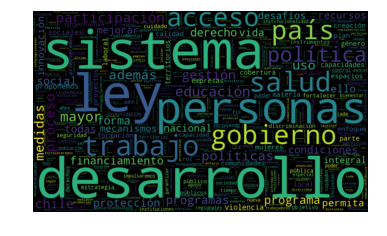

KAST
CAMBIANDO - 
presentación documento representa ejes fundamentales propuesta programática candidatura examen exhau


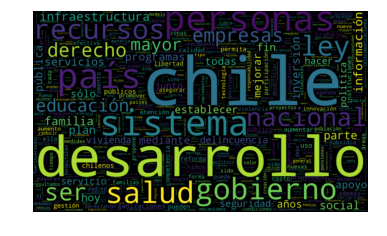

PROVOSTE
CAMBIANDO programa de gobierno 2022-2026 yasna provoste campillay
CAMBIANDO https
CAMBIANDO - 
yasna provoste campillay candidata presidencial nuevoPacto social n° programaGobierno yasna provoste


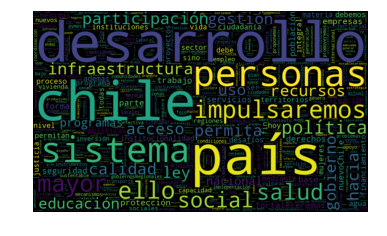

ME-O
CAMBIANDO - 
propuestas progresistas gobierno emergencia transición programa bienestar prosperidad socialFamilias


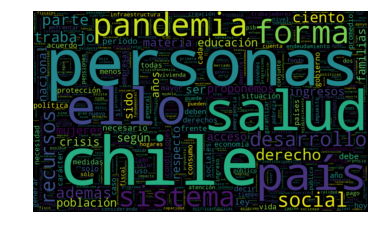

SICHEL
CAMBIANDO - 
CAMBIANDO objetivo general
programaGobierno cada cierto tiempo países viven situaciones históricas decisivas suelen cambiar rum


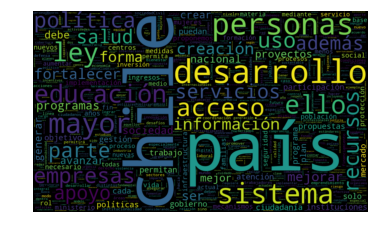

ARTÉS
CAMBIANDO programa político básico de unión patriótica por una patria industrializada, soberana y de perspectiva socialista ¡a refundar chile!
CAMBIANDO https
CAMBIANDO - 
índice índice preámbulo legado unidadPopular seguridadAlimentaria seguridadEnergética propiedad lecc


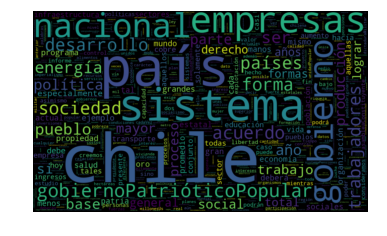

PARISI
CAMBIANDO elpoderdelagente
CAMBIANDO https
CAMBIANDO - 
poder gente tabla contenidos tabla contenidos partidoGente pdg prólogo introducción reflexión inicia


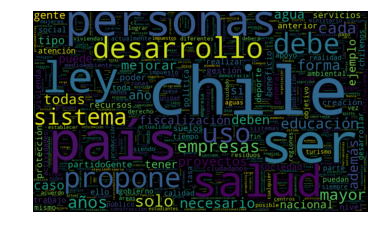

In [138]:
candidatos = ["boric","kast","provoste","me-o","sichel",u"artés","parisi"]
dicc = {} #acumular diccionario de candidatos
for candidato in candidatos:
    print(candidato.upper())
    text = get_text(candidato)
    text = proc_text(text, candidato)
    text = " ".join(text)
    print(text[:100])
    d_tf = word_cloud(text, candidato)
    a = open(candidato+"_clean.txt", "w", encoding="UTF-8")
    a.write(text)
    a.close()
    dicc[candidato] = d_tf


In [7]:
dicc_orig = dicc


In [33]:
dicc= dicc_orig

BORIC


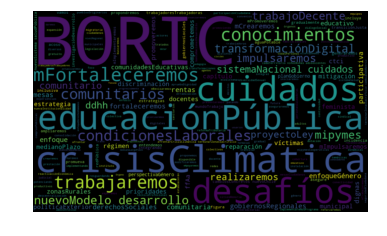

KAST


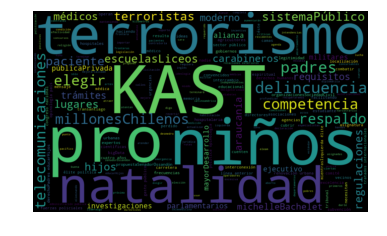

PROVOSTE


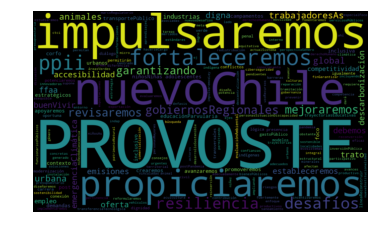

ME-O


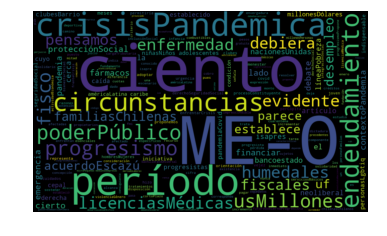

SICHEL


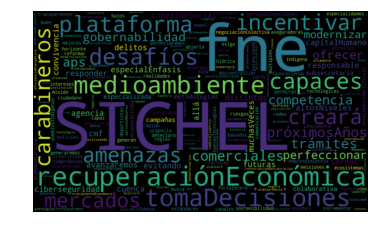

ARTÉS


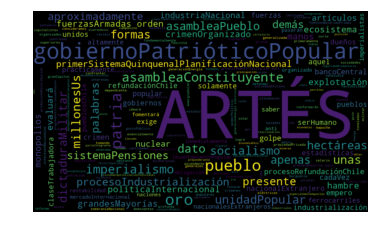

PARISI


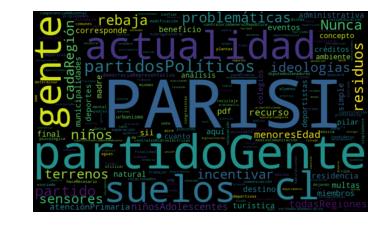

In [139]:
# Encontrando diferencias, con el uso de Tf iDF
#len(dicc[u'kast'])
idf = {}

#document frequency
for can_dicc in dicc.values():
    for word in can_dicc:
        if word not in idf:
            idf[word] = 0
        idf[word]+=1
#get IDF       
from math import log
for word in idf:
    #print "len " , len(dicc)
    #print "idf", idf[word]
    idf[word] = log(len(dicc)/idf[word])
    
dic_final = {}
for cand, tf in dicc.items():
    can_dicc = {}
    for word in tf:
        if idf[word] != 0:
            can_dicc[word] = tf[word]*idf[word]
    dic_final[cand]= can_dicc
    
#plot wordClouds2
for cand in dic_final:
    print(cand.upper())
    word_cloud_freq(cand,dic_final[cand])

In [29]:
dic_final

{'sichel': {'sichel+': 0.0}}

In [120]:
dic_final.keys()

dict_keys(['boric', 'jadue', 'briones', 'desbordes', 'lavín', 'sichel', 'narváez'])

## Exporta archivos de frecuencias


In [128]:
#tf
import codecs
ar_tf = codecs.open("CSV_TF/TF_TOTAL.csv", "w", encoding="UTF-8")

for cand, tf in dicc.items():
    ar_cand = codecs.open("CSV_TF/TF_"+cand+".csv", "w", encoding="UTF-8")
    lista = list(tf.items())
    lista.sort(key=lambda tup: tup[1])
    lista.reverse()
    for word,freq in lista:
        t_f = word + u","+str(freq)+"\n"
        ar_tf.write(cand+","+t_f)
        ar_cand.write(t_f)
    ar_cand.close()
ar_tf.close()

print("Archivos CSV de Term Frequency creados...")

#idf
ar_idf = codecs.open("CSV_TF_IDF/TF_IDF_TOTAL.csv", "w", encoding="UTF-8")

for cand, idf in dic_final.items():
    ar_cand = codecs.open("CSV_TF_IDF/TF_IDF_"+cand+".csv", "w", encoding="UTF-8")
    lista = list(idf.items())
    lista.sort(key=lambda tup: tup[1])
    lista.reverse()
    for word,freq in lista:
        t_f = word + u","+str(freq)+"\n"
        ar_idf.write(cand+","+t_f)
        ar_cand.write(t_f)
    ar_cand.close()
ar_idf.close()
print("Archivos CSV de Tf Inverse Document Frequency creados...")

Archivos CSV de Term Frequency creados...
Archivos CSV de Tf Inverse Document Frequency creados...
